In [26]:
import  pandas as pd
from matplotlib import pyplot as plt
import pandas_profiling
import numpy as np
import matplotlib
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [27]:
df = pd.read_excel('출입이력_이름(emp_nm)삭제.xlsx')
df.reset_index(inplace=True)
df.index=pd.to_datetime(df['msgTime'])
df.drop('msgTime', axis=1, inplace=True)

night = df.between_time('23:30:00','06:30:00')
night['night'] = 1
df = pd.merge(df, night['night'], left_on='msgTime', right_on='msgTime', how='left')
df['night'] = df['night'].fillna(0)
df.head()
df = df[df['event_msg'] != 'Grant access']
df.head()

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/3605568782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['night'] = 1


,index,seq,site_cd,site_nm,reader_cd,reader_nm,event_msg,card_no,regstatus_cd,regstatus_nm,...,department_nm,position_cd,position_nm,insertedDate,rev1,rev2,rev3,rev4,rev5,night
msgTime,,,,,,,,,,,,,,,,,,,,,
2022-10-11 09:01:12,115,309034643,SJ01-01,1동,0605L,1-A동 1층 스피드게이트1 입구,Deny access - Card/PIN not found,000000004D918529,NaN,NaN,...,NaN,NaN,NaN,2022-10-11 09:14:06.017,0605L,NaN,NaN,NaN,N,0.0
2022-10-11 08:59:48,204,309031739,SJ01-01,1동,0901L,1-C동 1층 스피드게이트1 출구,Deny access - Card/PIN not found,00000000E02EB686,NaN,NaN,...,NaN,NaN,NaN,2022-10-11 09:02:06.600,0901L,NaN,NaN,NaN,N,0.0
2022-10-11 08:49:33,322,309027222,SJ01-01,1동,0230L,1-A동 B1층 스피드게이트 입구,Deny access - Card/PIN not found,00000000A5DC26C1,NaN,NaN,...,NaN,NaN,NaN,2022-10-11 08:50:58.407,0230L,NaN,NaN,NaN,N,0.0
2022-10-11 06:47:10,727,309005397,SJ01-01,1동,0803L,1-B동 1층 스피드게이트1 입구,Deny access - Card/PIN not found,1741049903350,RegStatus0001,등록,...,노사후생과,NaN,NaN,2022-10-11 06:47:40.777,0803L,NaN,NaN,NaN,N,0.0
2022-10-11 06:47:05,728,309005392,SJ01-01,1동,0803L,1-B동 1층 스피드게이트1 입구,Deny access - Card/PIN not found,1741049903350,RegStatus0001,등록,...,노사후생과,NaN,NaN,2022-10-11 06:47:38.710,0803L,NaN,NaN,NaN,N,0.0


In [28]:
def visualization(graph_title, top_n, column_name):
    data = pd.DataFrame(df[column_name].value_counts())
    data.reset_index(inplace=True)
    data = data.sort_values('index')

    data = data.sort_values(by=column_name, ascending=False)
    other_value = data[column_name][top_n:].sum()
    num_other_values = len(data) - top_n
    new_data = {'index' : f'OtherValues({num_other_values})',
                column_name : other_value}
    plot_data = data[:top_n]
    plot_data = plot_data.append(new_data, ignore_index=True)


    plt.figure(figsize=(25,8))
    plt.bar(plot_data['index'], plot_data[column_name], width=0.3)
    plt.title(graph_title, fontsize = 30)


# 출입거부 기록

## 출입구별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


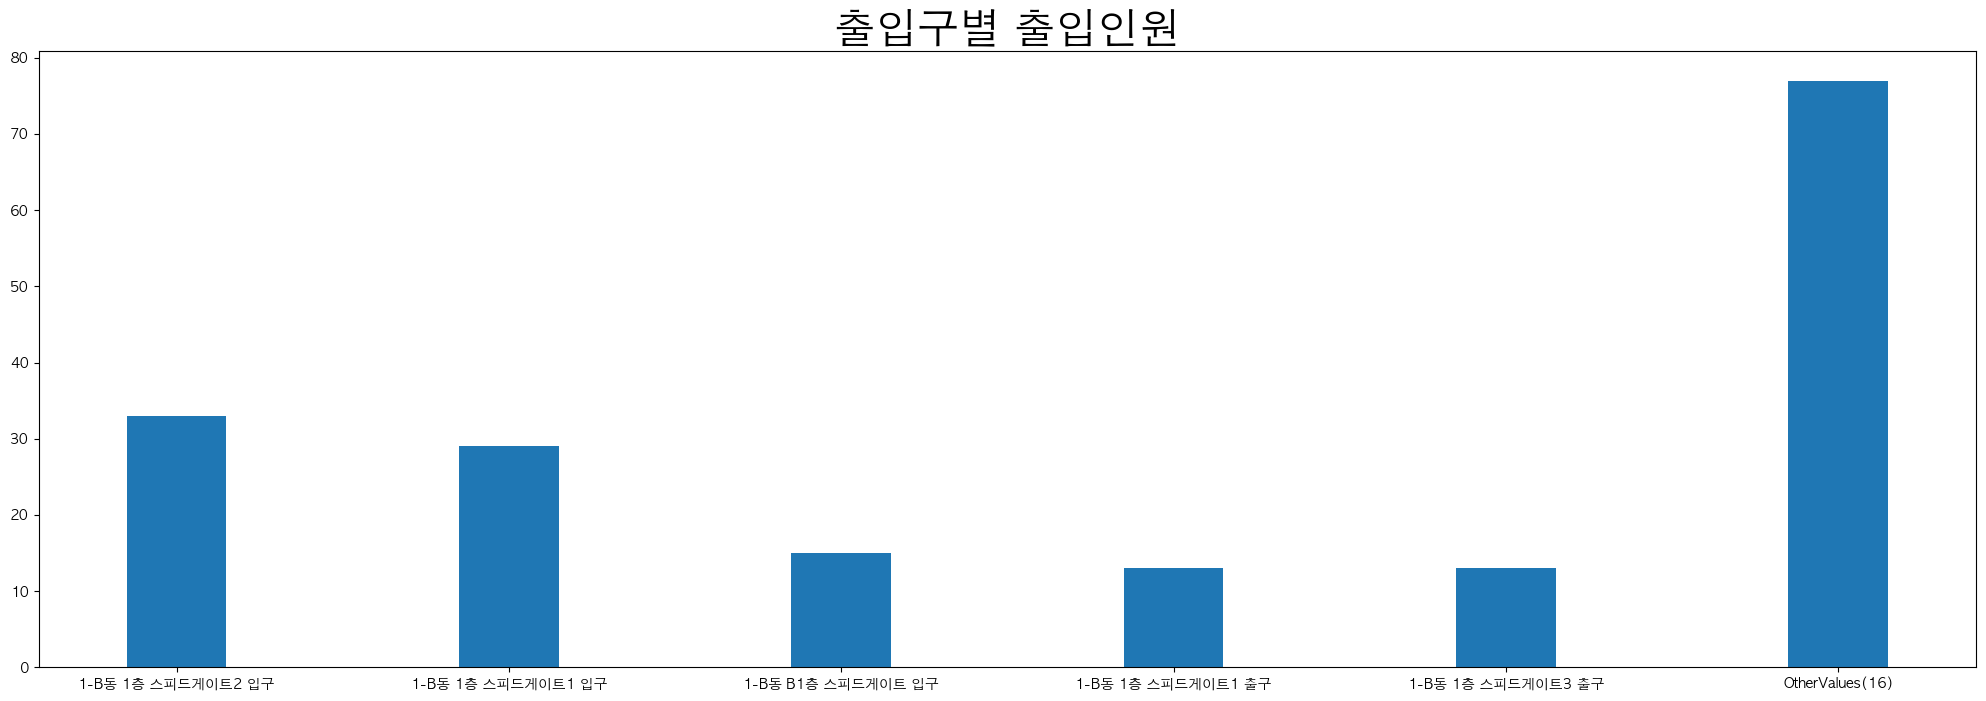

In [29]:
# 그래프 제목
graph_title = '출입구별 출입인원'
#표시 할 개수
top_n = 5
# 표시할 컬럼명
column_name = 'reader_nm'

visualization(graph_title,top_n,column_name)

## 출입거부 비율

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


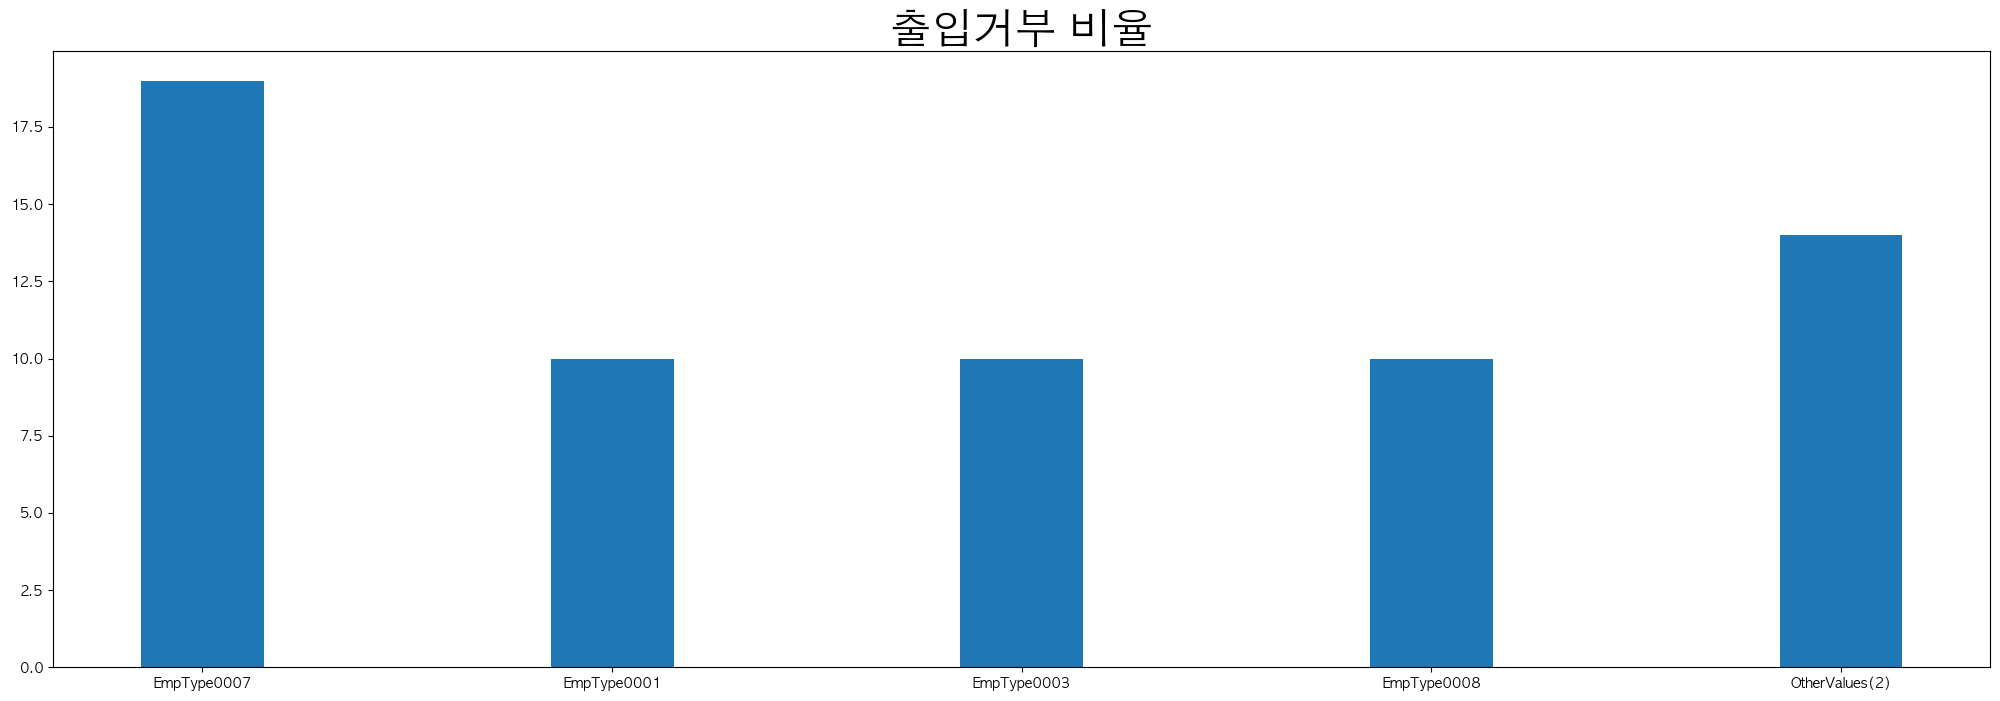

In [30]:
# 그래프 제목
graph_title = '출입거부 비율'
#표시 할 개수
top_n = 4
# 표시할 컬럼명
column_name = 'emptype_cd'
## 야간 출입인원
time = pd.DataFrame(df['night'].value_counts())
time.reset_index(inplace=True)
time = time.sort_values('index')

visualization(graph_title,top_n,column_name)

## 출입자 구분

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


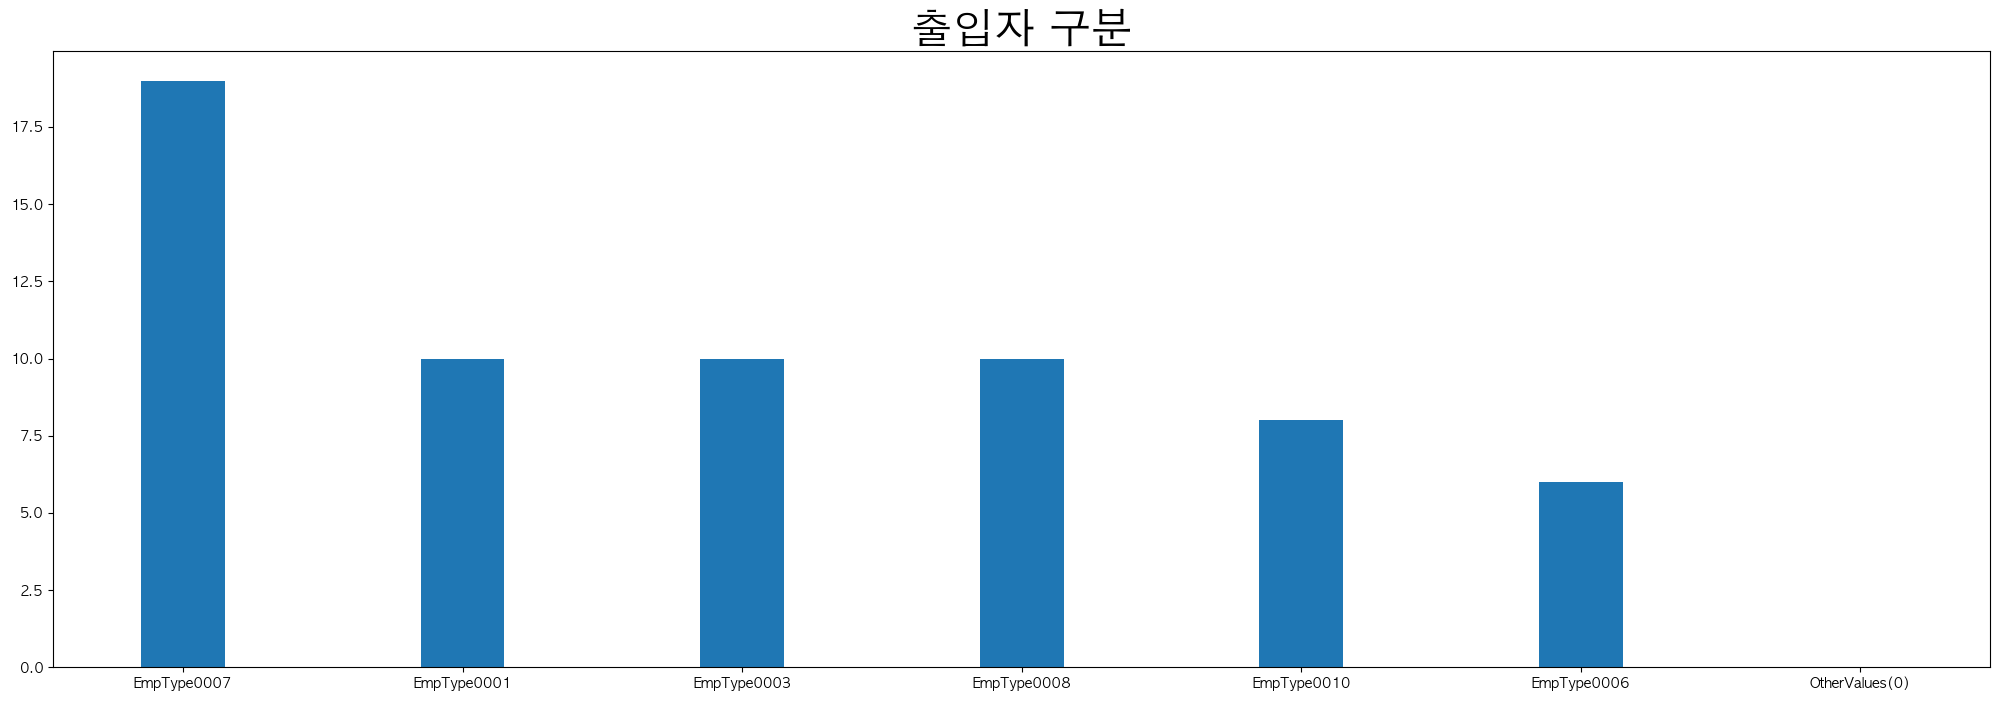

In [31]:
# 그래프 제목
graph_title = '출입자 구분'
#표시 할 개수
top_n = 6
# 표시할 컬럼명
visualization(graph_title,top_n,column_name)

## 부서별 출입 인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


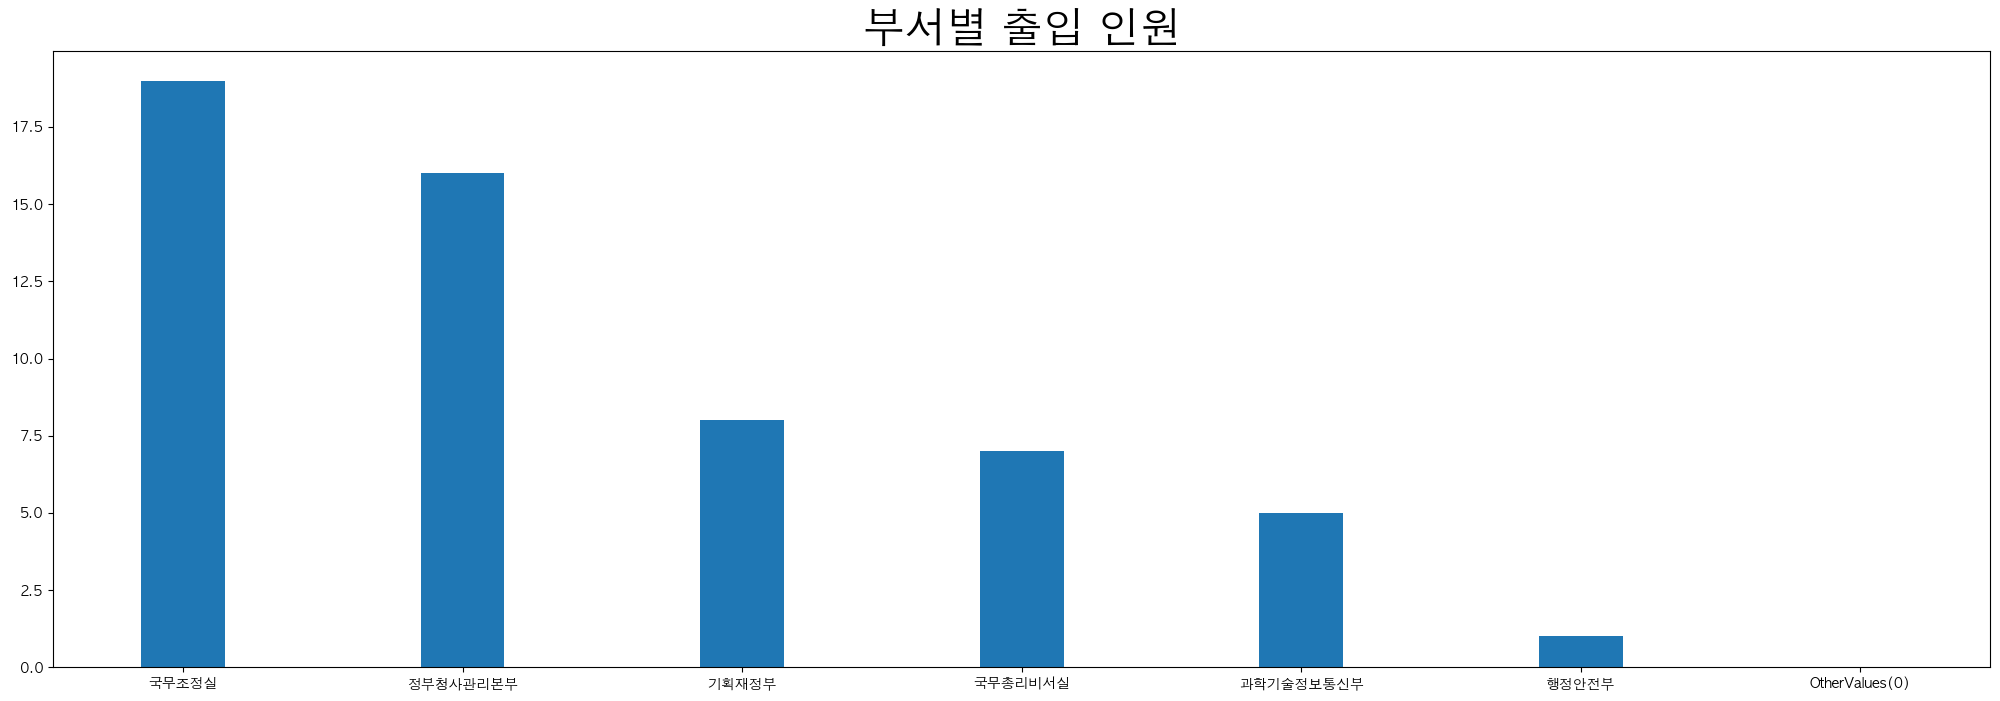

In [32]:
# 그래프 제목
graph_title = '부서별 출입 인원'
#표시 할 개수
top_n = 6
# 표시할 컬럼명
column_name = 'company_nm'

visualization(graph_title,top_n,column_name)

## 과별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


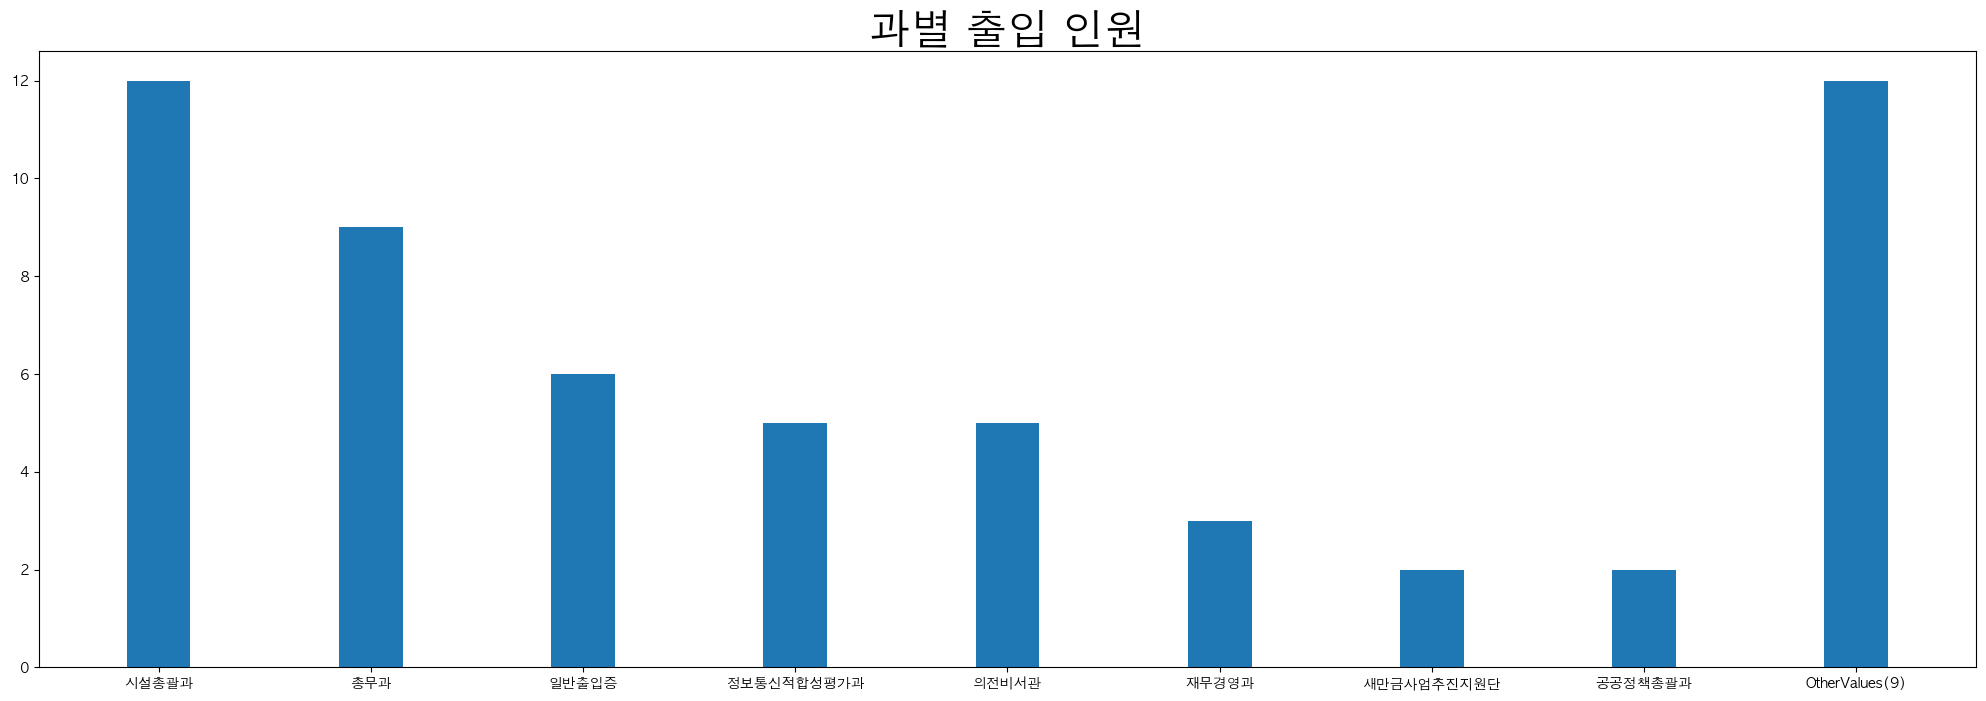

In [33]:
# 그래프 제목
graph_title = '과별 출입 인원'
#표시 할 개수
top_n = 8
# 표시할 컬럼명
column_name = 'department_nm'

visualization(graph_title,top_n,column_name)

## 직급 별 출입인원

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_49017/2278370564.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(new_data, ignore_index=True)


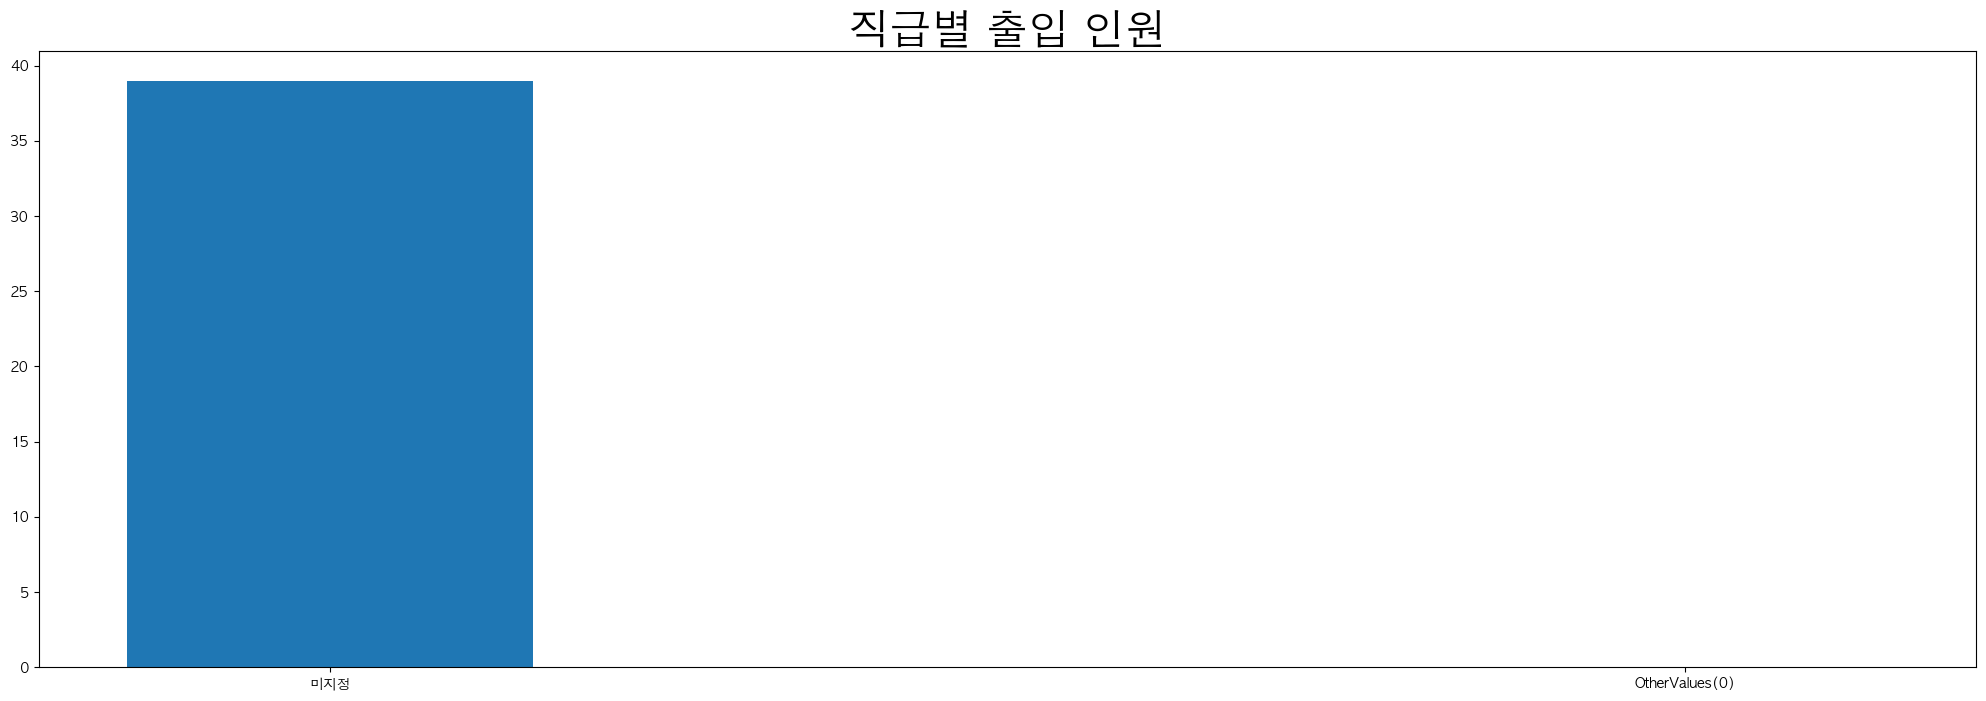

In [34]:
# 그래프 제목
graph_title = '직급별 출입 인원'
#표시 할 개수
top_n = 1
# 표시할 컬럼명
column_name = 'position_nm'

visualization(graph_title,top_n,column_name)

## 야간 출입인원

<BarContainer object of 1 artists>

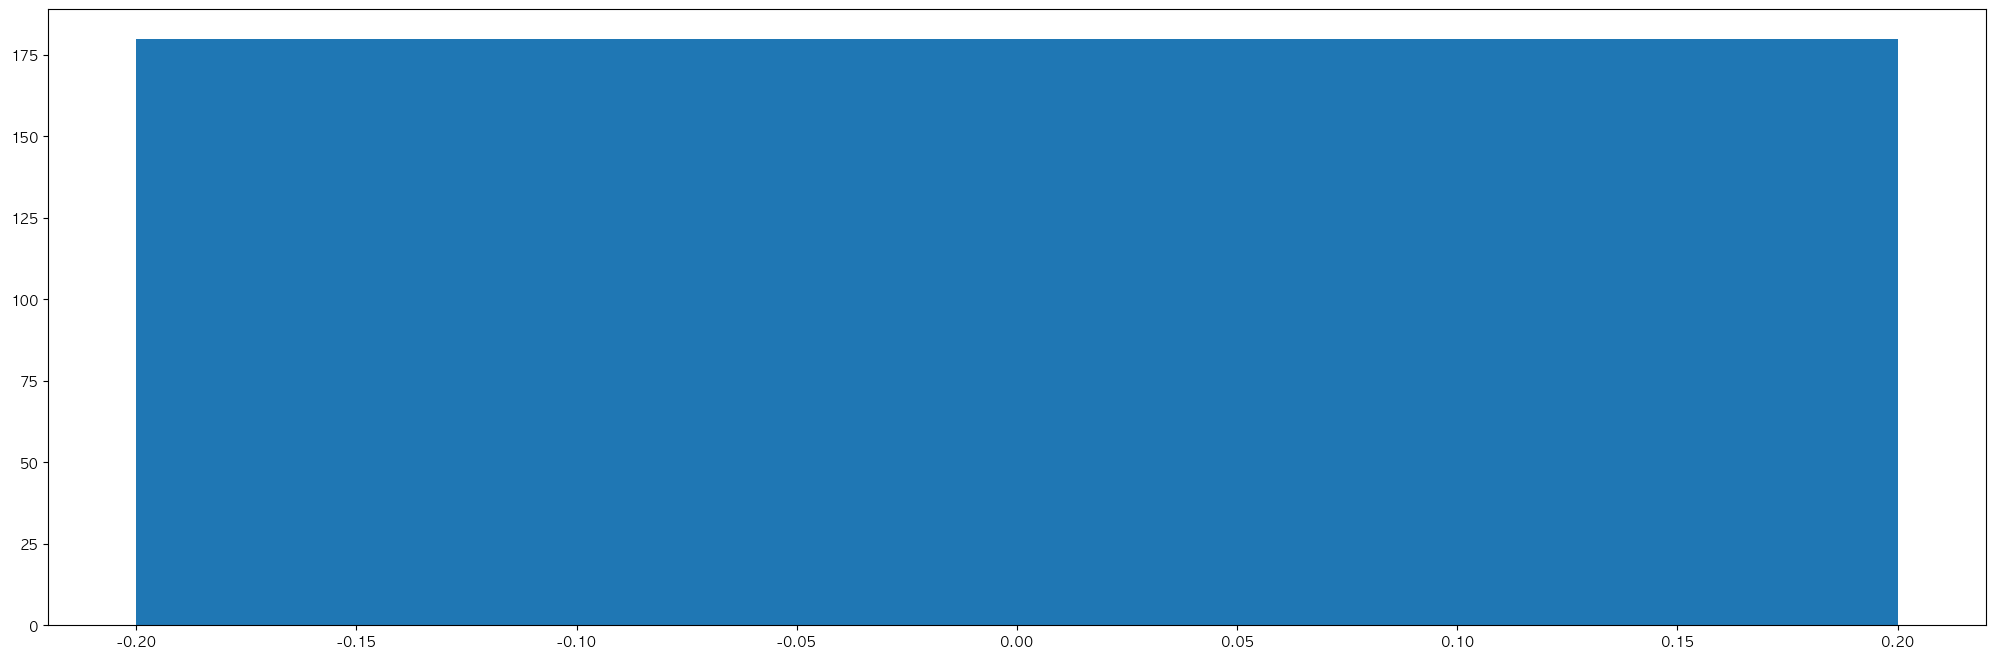

In [35]:
time = pd.DataFrame(df['night'].value_counts())
time.reset_index(inplace=True)
time = time.sort_values('index')

#동 입구별 차량 입차 대수
plt.figure(figsize=(25,8))
plt.bar(time['index'], time['night'], width=0.4)